In [9]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
tweets = pd.read_pickle("py_df.pkl")

In [12]:

tweets = tweets[tweets['hate'].isin(['0', '1'])]
labels = tweets['hate'].astype(int)

tweets['joined_tokens'] = tweets['noStop'].apply(lambda toks: " ".join(toks))

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(tweets['joined_tokens'])
feature_names = vectorizer.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.35, random_state=42)

clf = AdaBoostClassifier(estimator=MultinomialNB(), n_estimators=100,learning_rate=1.0,random_state=42)
clf.fit(X_train, y_train)

,estimator,MultinomialNB()
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Naive Bayes Model Evaluation:
Accuracy: 0.8358876324401386
Precision: 0.5521742815970162
Recall: 0.46885234102278045
F1_score: 0.5071135244545649


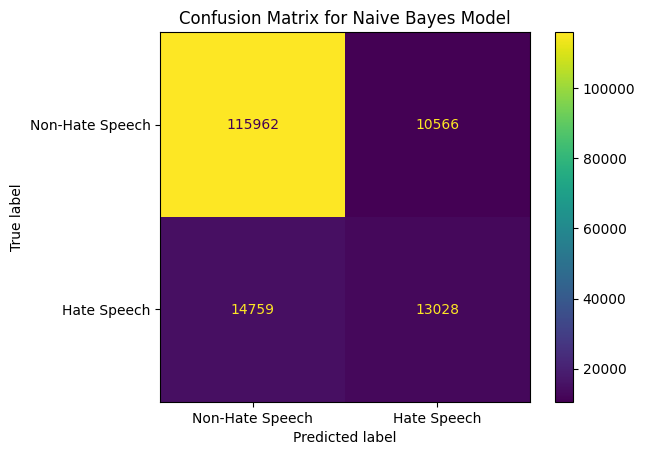

In [13]:
predictions = clf.predict(X_test)

labels = ['Non-Hate Speech', 'Hate Speech']
cm = metrics.confusion_matrix(y_test, predictions)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

print("Naive Bayes Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1_score:", metrics.f1_score(y_test, predictions))

display.plot()
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()